In [39]:
import os
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as ss

In [68]:
decode_z_mat = np.load('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Revised/data/decoding/decode_z_mvRM.npy')[[42,45,47,40,41,6,37,38,17,32,16,18,20,9,19,7,13,28,30,33],:]
decode_z_mat.shape

(20, 30)

In [69]:
weights = np.zeros((4,30))
weights[0,:] = np.array((1,1,1,1,1, 0.5,0.5,0.5,0.5,0.5, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0.5,0.5,0.5,0.5,0.5)) # V
weights[1,:] = np.array((0,0,0,0,0, 0.5,0.5,0.5,0.5,0.5, 1,1,1,1,1, 0.5,0.5,0.5,0.5,0.5, 0,0,0,0,0, 0,0,0,0,0)) # S
weights[2,:] = np.array((0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0.5,0.5,0.5,0.5,0.5, 1,1,1,1,1, 0.5,0.5,0.5,0.5,0.5)) # A
weights[3,:] = np.array((.1,.3,.5,.7,.9, .1,.3,.5,.7,.9, .1,.3,.5,.7,.9, .1,.3,.5,.7,.9, .1,.3,.5,.7,.9, .1,.3,.5,.7,.9))

weights

array([[1. , 1. , 1. , 1. , 1. , 0.5, 0.5, 0.5, 0.5, 0.5, 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5,
        0.5, 0.5, 0.5, 0.5],
       [0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0.5, 0.5, 0.5, 1. , 1. , 1. ,
        1. , 1. , 0.5, 0.5, 0.5, 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0.5, 0.5, 0.5, 0.5, 0.5, 1. , 1. , 1. , 1. , 1. , 0.5,
        0.5, 0.5, 0.5, 0.5],
       [0.1, 0.3, 0.5, 0.7, 0.9, 0.1, 0.3, 0.5, 0.7, 0.9, 0.1, 0.3, 0.5,
        0.7, 0.9, 0.1, 0.3, 0.5, 0.7, 0.9, 0.1, 0.3, 0.5, 0.7, 0.9, 0.1,
        0.3, 0.5, 0.7, 0.9]])

In [70]:
decode_z_thres = decode_z_mat.copy()
decode_z_thres[decode_z_mat < 2.327] = 0

decode_z_weight = np.zeros((20,4))
for i in range(20):
    a = decode_z_thres[i,:].copy()
    b = a/a.sum()
    c = b * weights
    decode_z_weight[i,:] = c.sum(axis=1)

decode_z_weight

array([[0.74326786, 0.        , 0.25673214, 0.77111187],
       [0.86966192, 0.        , 0.13033808, 0.72612812],
       [0.78533475, 0.1168492 , 0.09781605, 0.68091971],
       [0.71179245, 0.        , 0.28820755, 0.4973542 ],
       [0.71528406, 0.28471594, 0.        , 0.47871444],
       [0.11058952, 0.11427796, 0.77513253, 0.70645298],
       [0.33260679, 0.04619709, 0.62119612, 0.46922935],
       [0.55499976, 0.06610046, 0.37889978, 0.51483477],
       [0.06781968, 0.72181713, 0.2103632 , 0.67919917],
       [0.        , 0.88810423, 0.11189577, 0.65273425],
       [0.16088114, 0.83911886, 0.        , 0.7040017 ],
       [0.79642052, 0.20357948, 0.        , 0.5609089 ],
       [0.51342624, 0.48657376, 0.        , 0.41557663],
       [0.69372748, 0.30627252, 0.        , 0.45050702],
       [0.3822655 , 0.41870265, 0.19903185, 0.63992062],
       [0.74841733, 0.25158267, 0.        , 0.16797762],
       [0.27320301, 0.72679699, 0.        , 0.1       ],
       [0.42864543, 0.25895565,

In [71]:
def v_rgba2hue(rgba):

    rgbv = rgba[:3,:]
    H    = np.zeros(rgbv.shape[1])

    delta = np.max(rgbv, axis=0) - np.min(rgbv, axis=0)
    del_0 = delta==0
    H[del_0] = 0

    rgbv_pos = rgbv[:3, ~del_0]
    del_pos = delta[~del_0]
    ind_max = np.argmax(rgbv_pos, axis=0)
    Hp = np.zeros(rgbv_pos.shape[1])
    Hp[ind_max==0] = 60 * (((rgbv_pos[1,ind_max==0] - rgbv_pos[2,ind_max==0])/del_pos[ind_max==0]))
    Hp[ind_max==1] = 60 * (((rgbv_pos[2,ind_max==1] - rgbv_pos[0,ind_max==1])/del_pos[ind_max==1])+2)
    Hp[ind_max==2] = 60 * (((rgbv_pos[0,ind_max==2] - rgbv_pos[1,ind_max==2])/del_pos[ind_max==2])+4)

    H[~del_0] = Hp

    return H

In [72]:
import math 
H_weight = v_rgba2hue(decode_z_weight.T)/360*2*np.pi 
H_weight[H_weight < 0] = H_weight[H_weight < 0] + 2*np.pi 


M_w = decode_z_weight[:,3] 
M_weight = np.zeros_like(M_w)

for h in range(20):
    H_w = H_weight[h]*360 / (2*np.pi)
    if (H_w//30)%2 == 0:
        scaling = (1 * np.cos(30/360*2*np.pi)) / np.cos((H_w - 30*math.floor(H_w/30))/360*2*np.pi)
    else:
        scaling = (1 * np.cos(30/360*2*np.pi)) / np.cos((30*math.ceil(H_w/30) - H_w)/360*2*np.pi)

    M_weight[h] = M_w[h] * scaling

print(H_weight)
print(M_weight)

[5.92147282 6.12623958 0.02899044 5.85917092 0.41683276 4.1829779
 4.7104042  5.61318499 2.32263946 2.22633566 1.89361981 0.26768262
 0.99242853 0.46232541 1.22089792 0.35201851 1.70075351 5.95337367
 0.44898834 0.1691395 ]
[0.71400411 0.63667054 0.58994166 0.47256995 0.45340095 0.61181656
 0.46869319 0.47957374 0.60386488 0.57024071 0.62218158 0.50369991
 0.36044038 0.43591375 0.56265435 0.15497623 0.09377457 0.15878197
 0.19390344 0.26391453]


In [73]:
import matplotlib.colors as color
hsv = np.zeros((20,3))
hsv[:,0] = H_weight/(2*np.pi)
hsv[:,1] = .5
hsv[:,2] = .5
colors = np.zeros((20,4))
colors[:,:3] = np.round(color.hsv_to_rgb(hsv),2)
colors[:,3] = 1
colors

array([[0.5 , 0.25, 0.34, 1.  ],
       [0.5 , 0.25, 0.29, 1.  ],
       [0.5 , 0.26, 0.25, 1.  ],
       [0.5 , 0.25, 0.35, 1.  ],
       [0.5 , 0.35, 0.25, 1.  ],
       [0.25, 0.25, 0.5 , 1.  ],
       [0.37, 0.25, 0.5 , 1.  ],
       [0.5 , 0.25, 0.41, 1.  ],
       [0.25, 0.5 , 0.3 , 1.  ],
       [0.25, 0.5 , 0.28, 1.  ],
       [0.3 , 0.5 , 0.25, 1.  ],
       [0.5 , 0.31, 0.25, 1.  ],
       [0.5 , 0.49, 0.25, 1.  ],
       [0.5 , 0.36, 0.25, 1.  ],
       [0.46, 0.5 , 0.25, 1.  ],
       [0.5 , 0.33, 0.25, 1.  ],
       [0.34, 0.5 , 0.25, 1.  ],
       [0.5 , 0.25, 0.33, 1.  ],
       [0.5 , 0.36, 0.25, 1.  ],
       [0.5 , 0.29, 0.25, 1.  ]])

In [74]:
labels = ['visual\ncortex', 'visual\nperception', 'attention', 'facial\ncognition', 'imagery',
            'speech', 'reading', 'semantic', 'motor', 'pain',
            'inhibition', 'number', 'control\nconflict', 'working\nmemory', 'observation',
            'reward\nfeedback', 'fear', 'social\nempathy', 'decision\nmaking', 'memory\nretrieval']

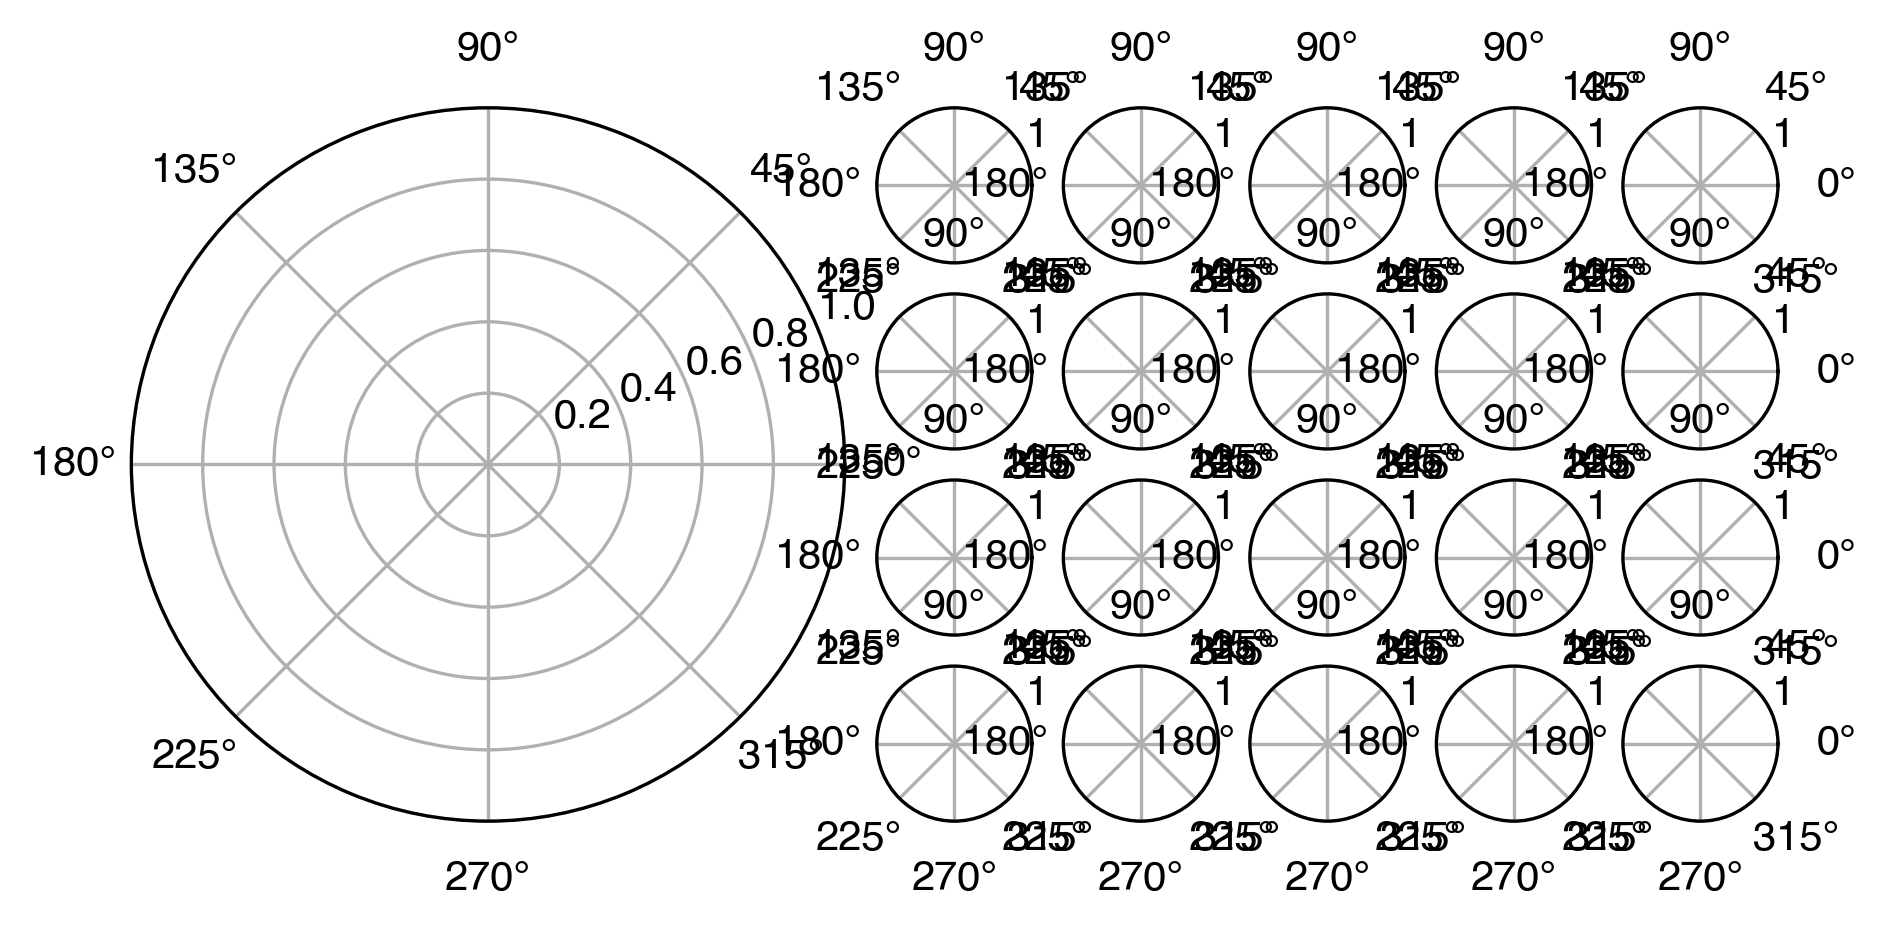

In [75]:
from matplotlib.gridspec import GridSpec
import matplotlib.patheffects as path_effects
plt.rcParams["font.family"] = "Helvetica"

cm = 1/2.54
fig=plt.figure(figsize=(18*cm, 8*cm), dpi=300, facecolor='none')
gs = GridSpec(4, 9, figure=fig)

ax_decode = fig.add_subplot(gs[0:4,0:4], projection='polar')

axs = [None] * 20
for h in range(20):
    axs[h] = fig.add_subplot(gs[h//5, h%5 + 4], projection='polar')


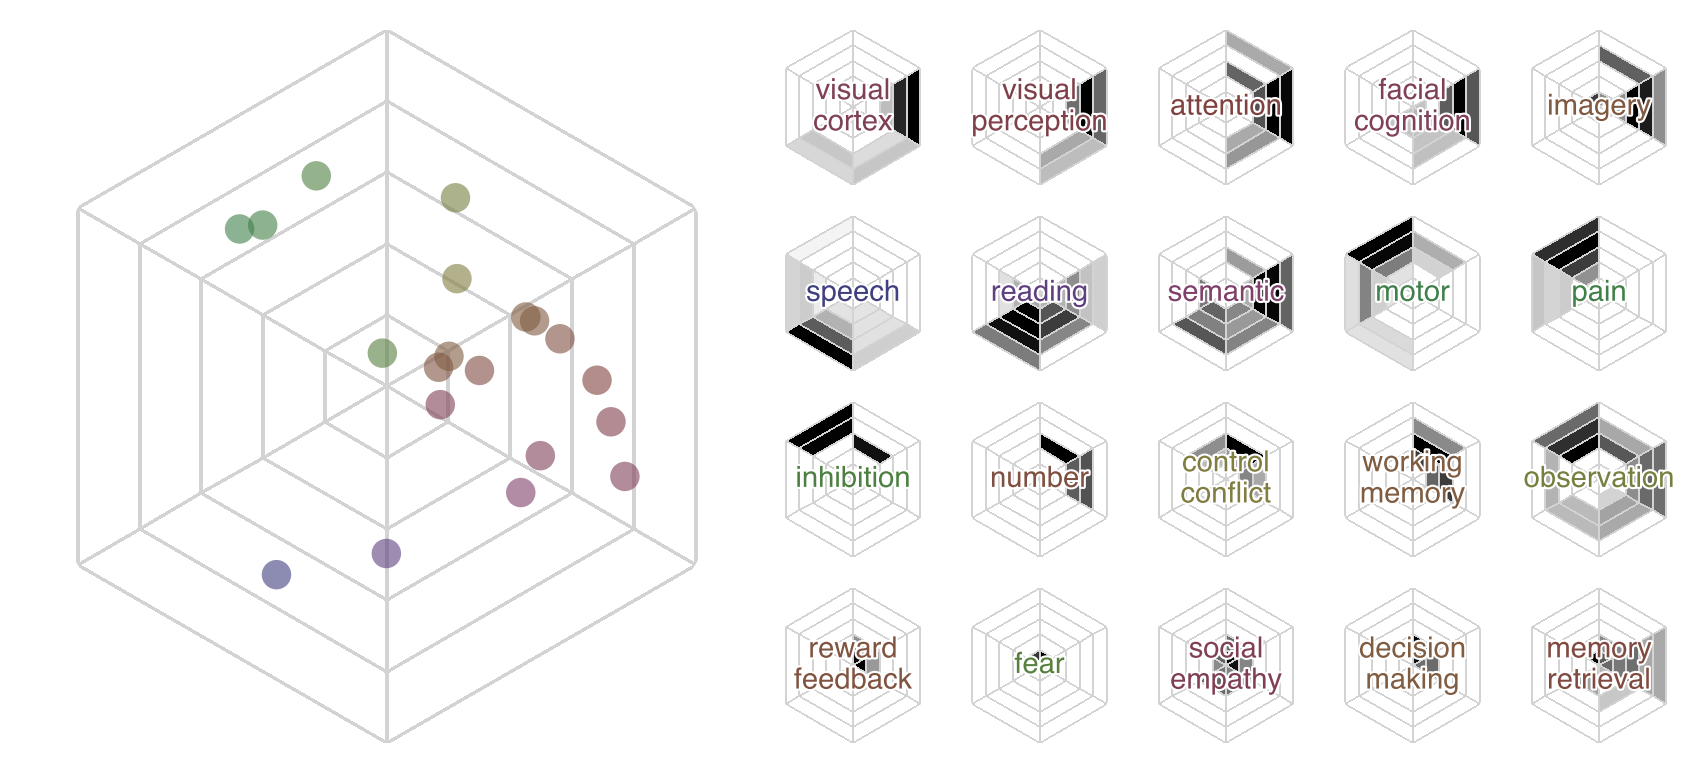

<Figure size 432x288 with 0 Axes>

In [76]:
rad = np.linspace(0, 1, 6)
azm = np.linspace(0, 2*np.pi, 7) - 30/360*2*np.pi
r, th = np.meshgrid(rad, azm)
ax_decode.pcolormesh(th, r, np.zeros(30).reshape((6,5)), cmap='Greys', edgecolors='lightgrey', linewidth=.5)
ax_decode.scatter(H_weight, M_weight, c=colors, s=50, alpha=.6, linewidths=0)
ax_decode.set_xticks([])
ax_decode.set_yticks([])
ax_decode.spines[['polar']].set_visible(False)

for k in range(20):
    decode_z_scale = decode_z_thres[k,:].copy()
    decode_z_scale = (decode_z_scale - decode_z_scale.min()) / (decode_z_scale.max() - decode_z_scale.min())
    # print(decode_z_scale.min(), decode_z_scale.max())
    axs[k].pcolormesh(th,r, decode_z_scale.reshape((6,5)), cmap='Greys', vmin=0, vmax=1, edgecolor='lightgrey', linewidth=.1)
    text = axs[k].text(0, 0, labels[k], fontsize='7', fontweight='bold', color=colors[k], fontfamily='Helvetica', ha='center', va='center')
    text.set_path_effects([path_effects.Stroke(linewidth=1, foreground=(1., 1., 1., 1.)), path_effects.Normal()])
    axs[k].set_xticks([])
    axs[k].set_yticks([])
    axs[k].spines[['polar']].set_visible(False)

plt.tight_layout()
fig

In [77]:
fig.savefig('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Revised/figures/plot/f07/hex_correct.pdf', transparent='True')